# Dataset de un supermercado #
### link: https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset ###
Diego Valenzuela | 200904

#### Introduccion ###
Este dataset es un ejemplo simple sobre datos recopilados de clientes de un supermercado. El analisis esta orientado a identificar caracteristicas o tendencias similares de clientes que comparten las mismas preferencias en relacion a un determinado producto.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#### Funciones

In [36]:
#hue solo para scatter plot
def graficar(df, colx, coly, xlbl, ylbl, titl, clr, tipo, aux):
    plt.figure(figsize=(16, 9))
    
    if tipo == 'line':
        if aux is not None:
            grafica = sns.lineplot(x=colx, y=coly, data=df, color=clr, linewidth = 3, hue = aux)
        else:
            grafica = sns.lineplot(x=colx, y=coly, data=df, color=clr, linewidth = 3)
        plt.plot(df[colx], df[coly], marker='o', color=clr)
        plt.grid(True)
    elif tipo == 'bar':
        if aux is not None:
            colores = sns.color_palette(clr)
            grafica = sns.barplot(x=colx, y=coly, data=df, hue = aux, palette = colores)
            grafica.bar_label(grafica.containers[0], fontsize = 10, color = 'black')
            grafica.bar_label(grafica.containers[1], fontsize = 10, color = 'black')
            grafica.bar_label(grafica.containers[2], fontsize = 10, color = 'black')
            grafica.bar_label(grafica.containers[3], fontsize = 10, color = 'black')
            grafica.bar_label(grafica.containers[4], fontsize = 10, color = 'black')
            grafica.bar_label(grafica.containers[5], fontsize = 10, color = 'black')
        else:
            grafica = sns.barplot(x=colx, y=coly, data=df, color=clr)
            grafica.bar_label(grafica.containers[0], fontsize = 10)
    elif tipo == 'scatter':
        if aux is not None:
            grafica = sns.scatterplot(x=colx, y=coly, data=df, hue=aux)
        else:
            grafica = sns.scatterplot(x=colx, y=coly, data=df)        
            
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(titl)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [3]:
def grafica_pie(df, datos, keys, pallet_color, title, expl):
    aux = sns.color_palette(pallet_color)
    plt.pie(df[datos], labels = df[keys], colors = aux, autopct='%1.1f%%', explode = expl, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
    plt.title(title)
    plt.show()

#### Exploracion

In [4]:
df_superstore = pd.read_csv('superstore_data.csv')
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df_superstore['Year_Birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900])

In [6]:
df_superstore['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [7]:
df_superstore['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

#### Limpia de datos

In [8]:
df_superstore['Dt_Customer'] = pd.to_datetime(df_superstore['Dt_Customer'])
money_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_superstore[money_columns] = df_superstore[money_columns].astype(float).round(2)
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

In [9]:
df_superstore.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189.0,...,111.0,189.0,218.0,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464.0,...,7.0,0.0,37.0,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134.0,...,15.0,2.0,30.0,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10.0,...,0.0,0.0,0.0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6.0,...,11.0,0.0,34.0,2,3,1,2,7,1,0


In [10]:
df_superstore = df_superstore.sort_values(by = 'Dt_Customer')
df_superstore.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
1509,2611,1959,Master,Together,82576.0,0,0,2012-01-08,66,1206.0,...,168.0,18.0,18.0,1,2,4,12,1,0,0
2222,10001,1985,2n Cycle,Together,7500.0,1,0,2012-01-08,98,5.0,...,13.0,14.0,34.0,4,2,1,3,9,0,0
455,4692,1976,Graduation,Married,7500.0,1,0,2012-01-08,19,7.0,...,13.0,7.0,32.0,5,4,1,2,9,1,0
1398,7118,1957,Graduation,Married,73803.0,0,1,2012-01-08,61,833.0,...,52.0,26.0,174.0,2,9,5,6,6,1,0
2239,4070,1969,PhD,Married,94871.0,0,2,2012-01-09,99,169.0,...,188.0,0.0,144.0,1,8,5,4,7,1,0


In [11]:
df_superstore = df_superstore.assign(MntTotal = lambda x: (x['MntWines'] + x['MntFruits'] + x['MntMeatProducts'] 
                                                           + x['MntFishProducts'] + x['MntSweetProducts'] + x['MntGoldProds']))

In [12]:
df_superstore = df_superstore.assign(TotalPurchases = lambda x: (x['NumDealsPurchases'] + x['NumWebPurchases']
                                                                 + x['NumCatalogPurchases'] + x['NumStorePurchases']))

In [13]:
df_superstore = df_superstore.assign(TotalChildren = lambda x: (x['Kidhome'] + x['Teenhome']))

In [14]:
current_year = datetime.now().year
df_superstore['Age'] = current_year - df_superstore['Year_Birth']
df_superstore = df_superstore.drop('Year_Birth', axis = 1)

In [15]:
df_superstore['Income'].isna().any()

True

In [16]:
df_superstore = df_superstore.dropna(subset = 'Income')

In [17]:
df_superstore['Marital_Status'].unique()

array(['Together', 'Married', 'Divorced', 'Single', 'Widow', 'YOLO',
       'Absurd', 'Alone'], dtype=object)

In [18]:
df_superstore['Marital_Status'] = df_superstore['Marital_Status'].replace('Alone', 'Single')
df_superstore['Marital_Status'] = df_superstore['Marital_Status'].replace(['Absurd', 'YOLO'], 'Other')

In [19]:
df_superstore['Marital_Status'].unique()

array(['Together', 'Married', 'Divorced', 'Single', 'Widow', 'Other'],
      dtype=object)

In [20]:
df_superstore['Age'].unique()

array([ 65,  39,  48,  67,  55,  53,  37,  49,  75,  36,  45,  59,  61,
        77,  68,  51,  47,  42,  60,  64,  69,  46,  57,  40,  70,  72,
        32,  58,  30,  43,  66,  35,  38,  56,  71,  73,  50,  79,  62,
        41,  74,  54,  44,  52,  63,  34,  78,  28,  76,  33,  29,  31,
        81,  80,  83,  84, 124, 125, 131])

In [21]:
df_superstore = df_superstore[df_superstore['Age'] < 100]

In [22]:
quantiles = df_superstore['Age'].quantile([0, 0.25, 0.5, 0.75, 1])
age_range = quantiles.tolist()
labels = ['27-47', '47-54', '54-65', '65-84']
df_superstore['Age_Range'] = pd.cut(df_superstore['Age'], bins = age_range, labels = labels, include_lowest=True)

intervals = pd.cut(df_superstore['Age'], bins = age_range, include_lowest=True).cat.categories
for label, interval in zip(labels, intervals):
    print(f'Rango {label}: {interval}')

Rango 27-47: (27.999, 47.0]
Rango 47-54: (47.0, 54.0]
Rango 54-65: (54.0, 65.0]
Rango 65-84: (65.0, 84.0]


In [23]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 1509 to 664
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2213 non-null   int64         
 1   Education            2213 non-null   object        
 2   Marital_Status       2213 non-null   object        
 3   Income               2213 non-null   float64       
 4   Kidhome              2213 non-null   int64         
 5   Teenhome             2213 non-null   int64         
 6   Dt_Customer          2213 non-null   datetime64[ns]
 7   Recency              2213 non-null   int64         
 8   MntWines             2213 non-null   float64       
 9   MntFruits            2213 non-null   float64       
 10  MntMeatProducts      2213 non-null   float64       
 11  MntFishProducts      2213 non-null   float64       
 12  MntSweetProducts     2213 non-null   float64       
 13  MntGoldProds         2213 non-null  

In [24]:
df_superstore.head()

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,MntTotal,TotalPurchases,TotalChildren,Age,Age_Range
1509,2611,Master,Together,82576.0,0,0,2012-01-08,66,1206.0,55.0,...,4,12,1,0,0,1910.0,19,0,65,54-65
2222,10001,2n Cycle,Together,7500.0,1,0,2012-01-08,98,5.0,17.0,...,1,3,9,0,0,100.0,10,1,39,27-47
455,4692,Graduation,Married,7500.0,1,0,2012-01-08,19,7.0,0.0,...,1,2,9,1,0,71.0,12,1,48,47-54
1398,7118,Graduation,Married,73803.0,0,1,2012-01-08,61,833.0,80.0,...,5,6,6,1,0,1528.0,22,1,67,65-84
2239,4070,PhD,Married,94871.0,0,2,2012-01-09,99,169.0,24.0,...,5,4,7,1,0,1078.0,18,2,55,54-65


#### Analisis

In [25]:
df_marital_mean = df_superstore.groupby('Marital_Status')['MntTotal'].mean().round(2).reset_index()
df_marital_mean = df_marital_mean.sort_values(by = 'MntTotal', ascending = False)
df_marital_mean

,Marital_Status,MntTotal
2,Other,808.25
5,Widow,727.96
0,Divorced,612.99
3,Single,611.58
4,Together,606.67
1,Married,591.46


In [26]:
df_marital_sum = df_superstore.groupby('Marital_Status')['MntTotal'].sum().round(2).reset_index()
df_marital_sum = df_marital_sum.sort_values(by = 'MntTotal', ascending = False)
df_marital_sum

,Marital_Status,MntTotal
1,Married,506885.0
4,Together,347016.0
3,Single,289279.0
0,Divorced,141601.0
5,Widow,55325.0
2,Other,3233.0


In [27]:
df_marital_purchases = df_superstore.groupby('Marital_Status')['TotalPurchases'].sum().reset_index()
df_marital_purchases = df_marital_purchases.sort_values(by = 'TotalPurchases', ascending = False)
df_marital_purchases

,Marital_Status,TotalPurchases
1,Married,12810
4,Together,8503
3,Single,6768
0,Divorced,3529
5,Widow,1264
2,Other,77


In [28]:
df_education_mean = df_superstore.groupby('Education')['MntTotal'].mean().round(2).reset_index()
df_education_mean = df_education_mean.sort_values(by = 'MntTotal', ascending = False)
df_education_mean

,Education,MntTotal
4,PhD,674.28
2,Graduation,621.69
3,Master,609.77
0,2n Cycle,499.49
1,Basic,81.80


In [29]:
df_education_sum = df_superstore.groupby('Education')['MntTotal'].sum().round(2).reset_index()
df_education_sum = df_education_sum.sort_values(by = 'MntTotal', ascending = False)
df_education_sum

,Education,MntTotal
2,Graduation,693802.0
4,PhD,323656.0
3,Master,222565.0
0,2n Cycle,98899.0
1,Basic,4417.0


In [30]:
df_education_purchases = df_superstore.groupby('Education')['TotalPurchases'].sum().reset_index()
df_education_purchases = df_education_purchases.sort_values(by = 'TotalPurchases', ascending = False)
df_education_purchases

,Education,TotalPurchases
2,Graduation,16748
4,PhD,7610
3,Master,5436
0,2n Cycle,2778
1,Basic,379


In [31]:
product_sells = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_grad = df_superstore[df_superstore['Education'] == 'Graduation']
df_grad_prod = df_grad.groupby(['Marital_Status', 'Age_Range'])[product_sells].sum().reset_index()
df_grad_prod = df_grad_prod.sort_values(by = product_sells, ascending = False)
df_grad_prod.head(10)

/tmp/ipykernel_10656/3243350875.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grad_prod = df_grad.groupby(['Marital_Status', 'Age_Range'])[product_sells].sum().reset_index()


,Marital_Status,Age_Range,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
7,Married,65-84,32213.0,3292.0,18574.0,4343.0,3260.0,5293.0
5,Married,47-54,29529.0,2734.0,15851.0,4219.0,3421.0,4680.0
18,Together,54-65,29402.0,2640.0,15463.0,3122.0,2275.0,4177.0
4,Married,27-47,28406.0,3611.0,22519.0,5349.0,4090.0,6208.0
6,Married,54-65,26706.0,2899.0,16513.0,3909.0,2697.0,5262.0
19,Together,65-84,21998.0,1465.0,11374.0,3103.0,1823.0,3757.0
16,Together,27-47,19290.0,2713.0,15895.0,3441.0,2674.0,3386.0
12,Single,27-47,19104.0,3417.0,18087.0,4425.0,2179.0,4550.0
17,Together,47-54,18600.0,1740.0,11410.0,3302.0,2009.0,3364.0
14,Single,54-65,17328.0,1822.0,10551.0,2307.0,1530.0,2569.0


In [32]:
corr_income_sells = df_superstore['Income'].corr(df_superstore['MntTotal'])
print("Correlación entre ingresos y gastos totales en compras:", corr_income_sells)

Correlación entre ingresos y gastos totales en compras: 0.6675161589034101


In [33]:
corr_income_purchases = df_superstore['Income'].corr(df_superstore['TotalPurchases'])
print("Correlación entre ingresos y compras totales:", corr_income_purchases)

Correlación entre ingresos y compras totales: 0.5674318429956434


#### Graficas

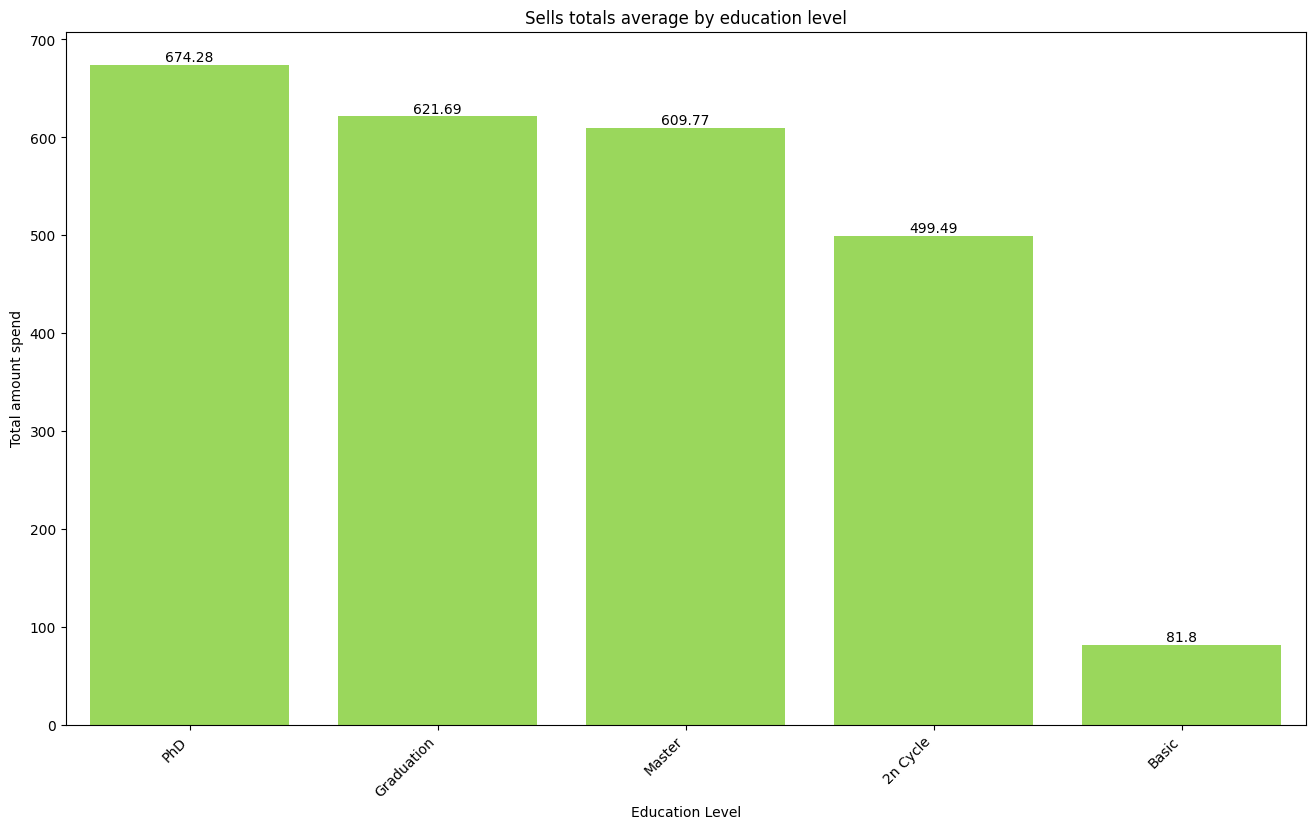

In [37]:
graficar(df_education_mean, 'Education', 'MntTotal', 'Education Level', 'Total amount spend', 
         'Sells totals average by education level','#9AEB48', 'bar', None)

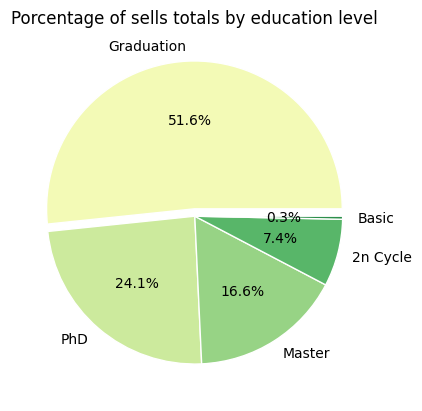

In [38]:
explode = [0.05, 0, 0, 0, 0]
grafica_pie(df_education_sum, 'MntTotal', 'Education', 'YlGn', 'Porcentage of sells totals by education level', explode)

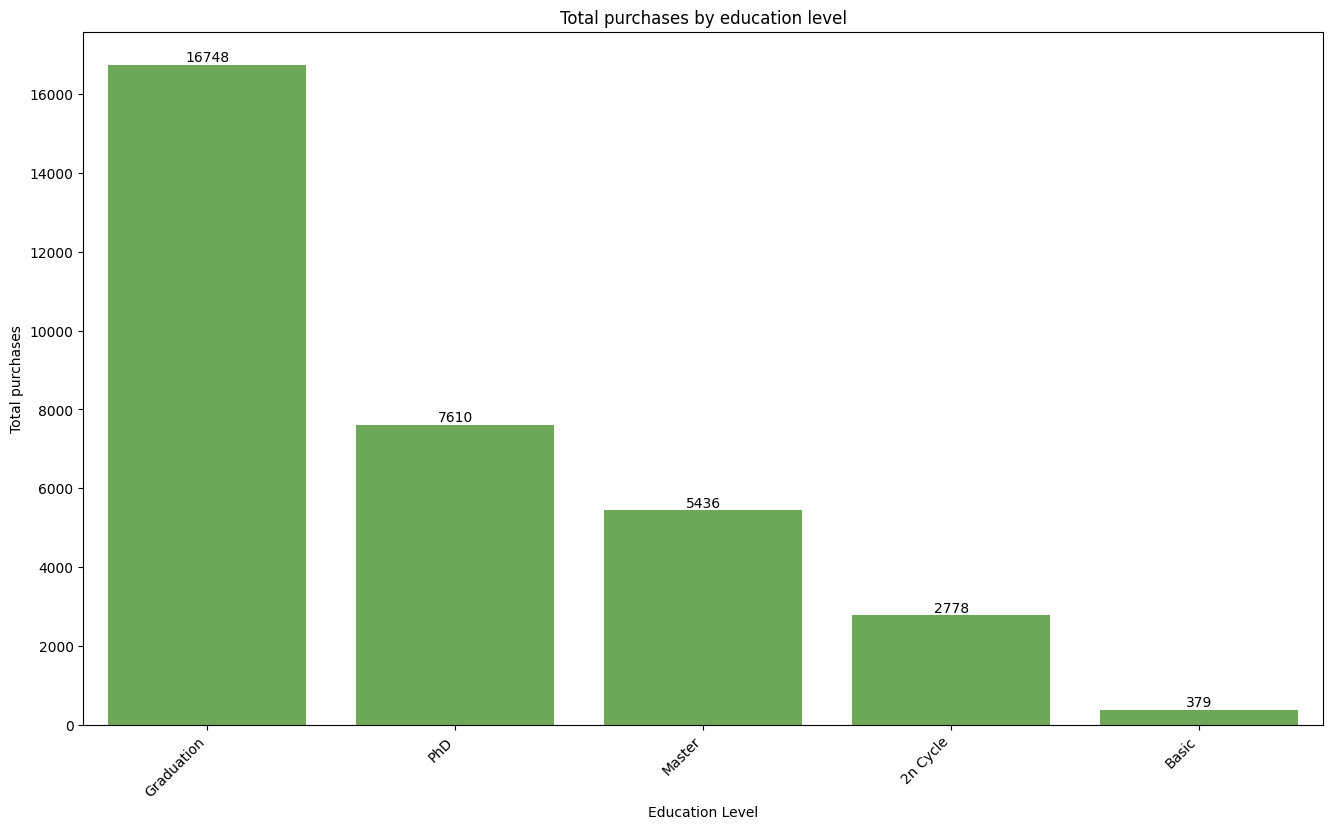

In [39]:
graficar(df_education_purchases, 'Education', 'TotalPurchases', 'Education Level', 'Total purchases', 
         'Total purchases by education level','#68B64C', 'bar', None)

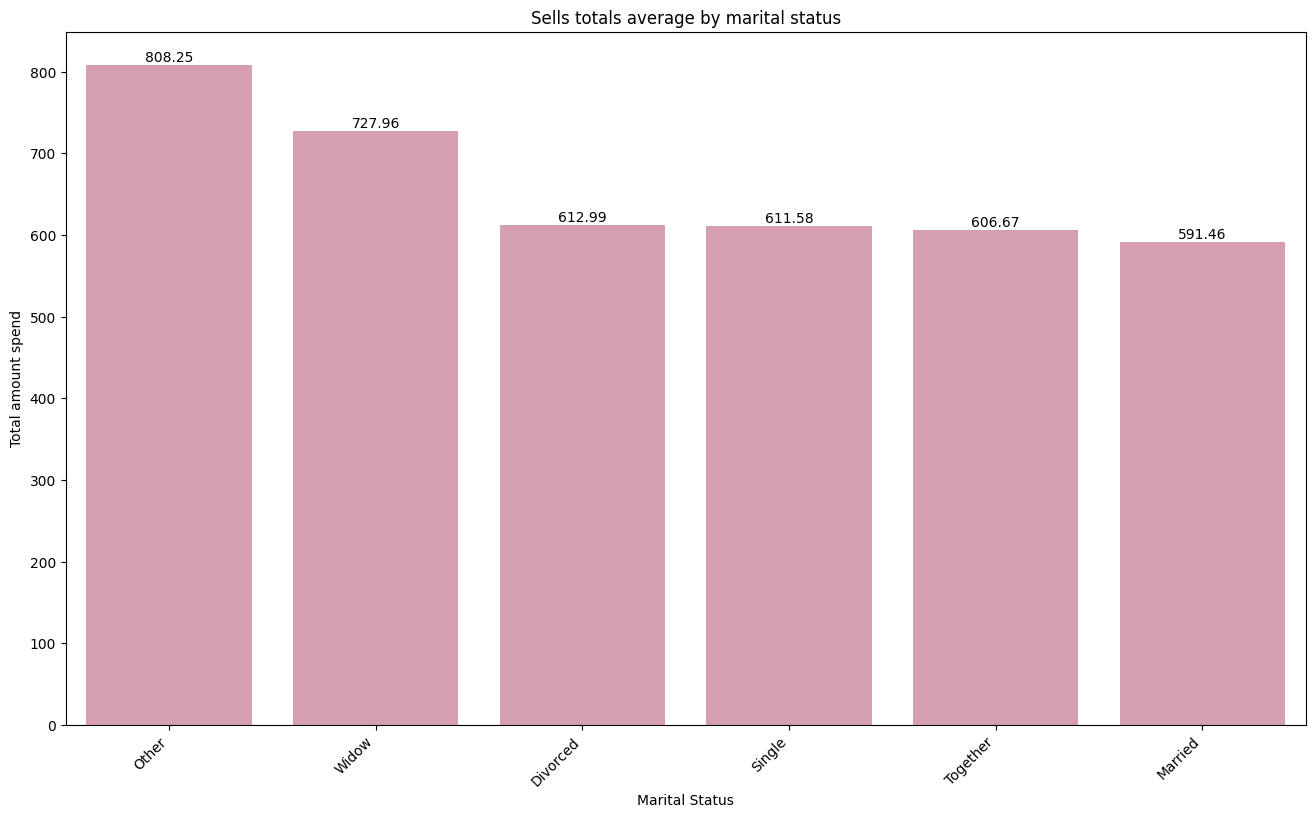

In [40]:
graficar(df_marital_mean, 'Marital_Status', 'MntTotal', 'Marital Status', 'Total amount spend', 
         'Sells totals average by marital status','#DF95AE', 'bar', None)

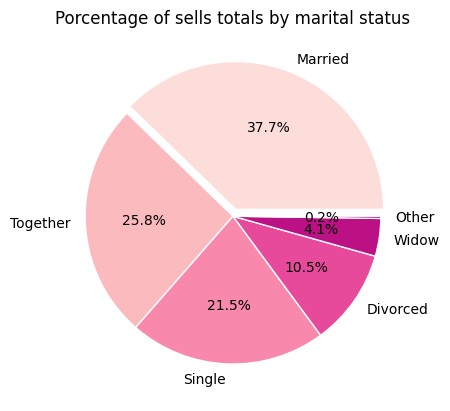

In [41]:
explode = [0.05, 0, 0, 0, 0, 0]
grafica_pie(df_marital_sum, 'MntTotal', 'Marital_Status', 'RdPu', 'Porcentage of sells totals by marital status', explode)

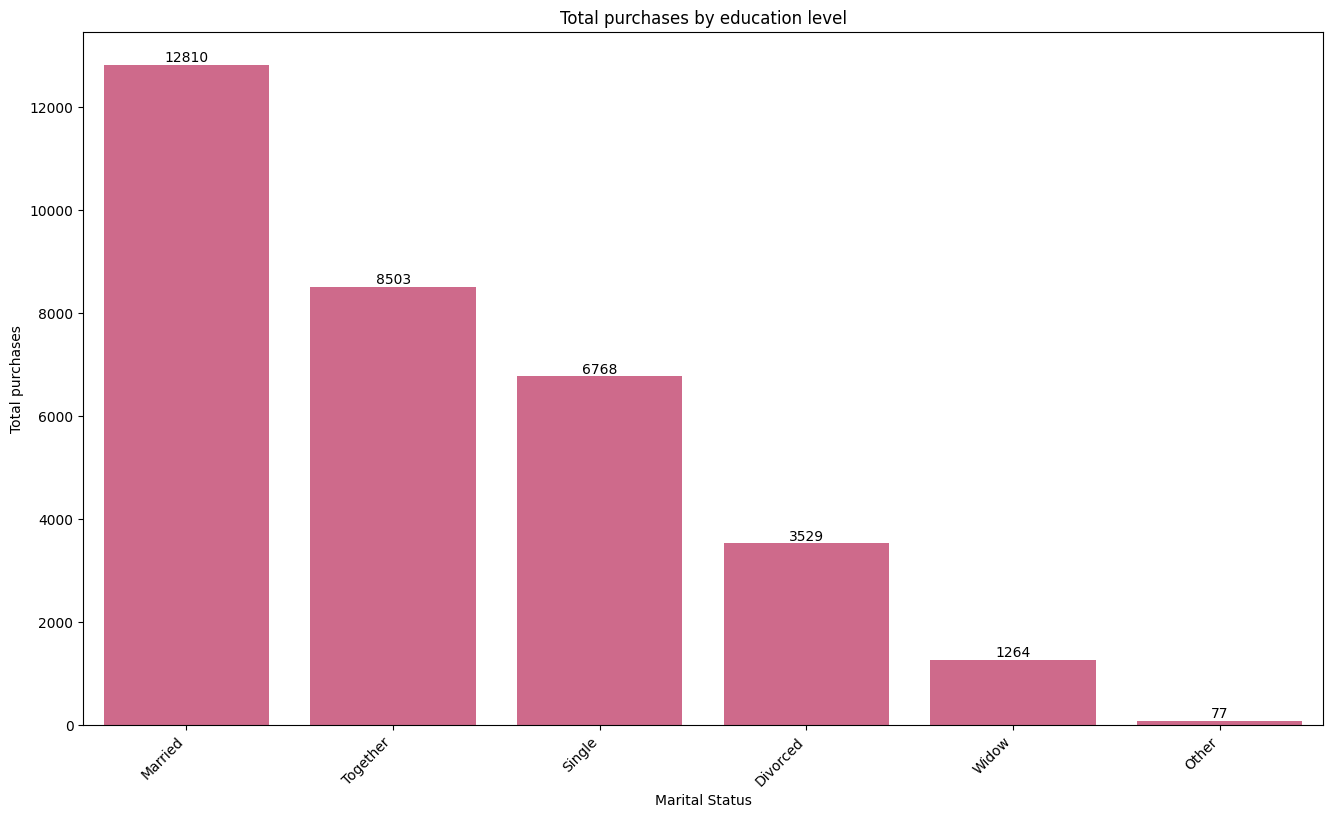

In [42]:
graficar(df_marital_purchases, 'Marital_Status', 'TotalPurchases', 'Marital Status', 'Total purchases', 
         'Total purchases by education level','#DF5986', 'bar', None)

/tmp/ipykernel_10656/2406315664.py:15: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  grafica = sns.barplot(x=colx, y=coly, data=df, hue = aux, palette = colores)


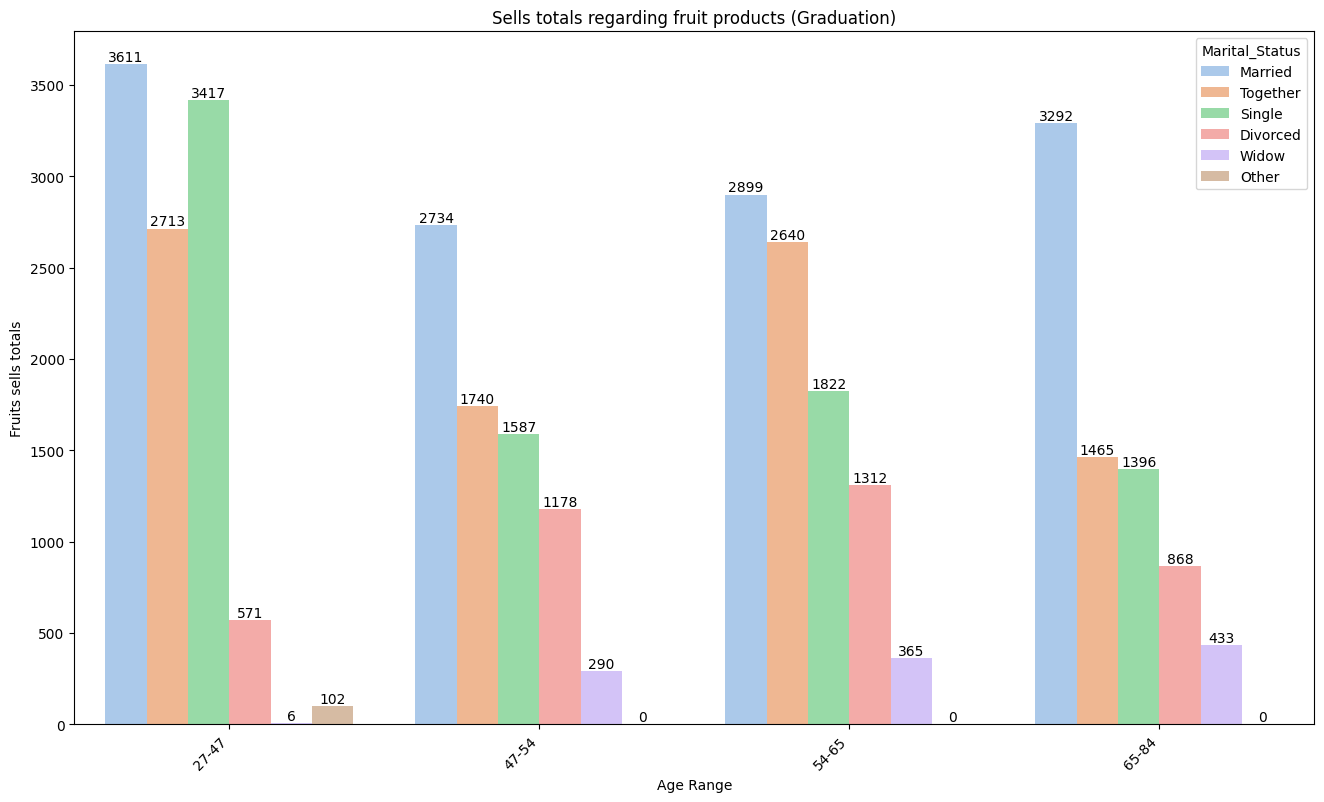

In [43]:
graficar(df_grad_prod, 'Age_Range', 'MntFruits', 'Age Range', 'Fruits sells totals', 
         'Sells totals regarding fruit products (Graduation)', 'pastel', 'bar', 'Marital_Status')

#### Conclusion

Al explorar este dataset, me percate que los clientes que contaban con un titulo simple o de licenciatura (graduate) fueron los que mas compras realizban, ademas al filtrar los datos en base al estatus marital, se establece que los clientes que cuentan con pareja (casados o juntos) fueron tambien los que mas compras realizaron. Luego opte por filtrar los datos originales solo tomando en consideracion los clientes con un nivel de educacion 'graduation' y despues en base al gasto total en los diferentes tipos de productos (frutas, carne, dulces, etc.) grafique por estatus marital y rango de edad, donde pude identificar que una vez mas los clientes casados o en pareja son los que mas gastan.

En resumen, los clientes casados o en pareja son los que mas compras realizan. Ademas entre mayor sea el ingreso del cliente, mayor sera la actividad de compras lo que implica mayores gastos.